In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc("font", family="serif", size=16)
plt.rc("mathtext", fontset="cm")
plt.rc("lines", lw=2)

import sympy as sp
from sympy import *
from IPython.display import display, Latex

D = lambda f, x : (np.array(diff(f(x), Matrix(x))).T)[0]
def pr(T):
    if len(np.shape(T))==1:
        return display(Latex("$$" + sp.latex(Matrix(T)) +"$$"))
    elif len(np.shape(T))==2:
        return display(Latex("$$" + sp.latex(Matrix(T)) +"$$"))
    else:
        return display(Latex("$$" + sp.latex(T) +"$$"))

def smp(A, f=simplify):
    n, m = np.shape(A)
    B = np.empty_like(A)
    for i in range(n):
        for j in range(m):
            B[i, j] = f(A[i,j])
    return B

def smp2(A, f=simplify):
    n  = np.shape(A)[0]
    B = np.empty_like(A)
    for i in range(n):
        B[i] = f(A[i])
    return B

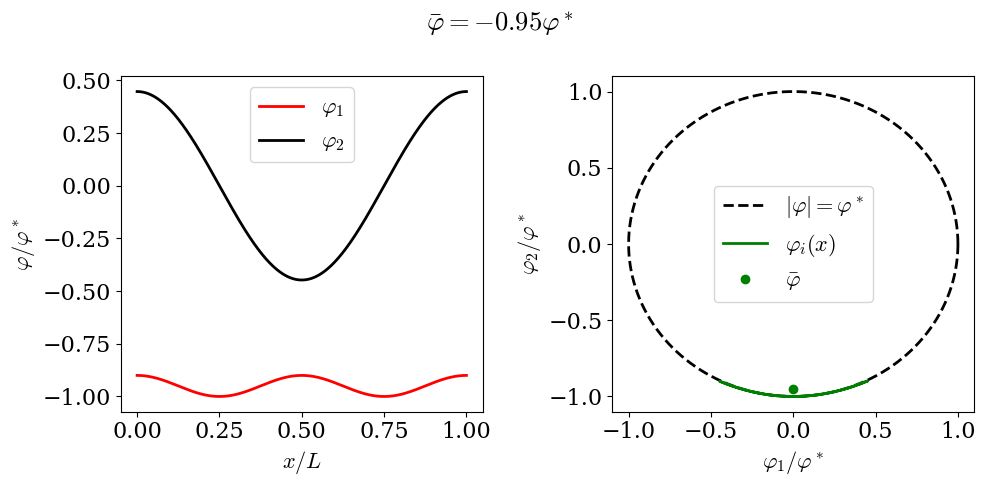

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
L = 1
xx = np.linspace(0, L, 1000)
dd = .95
f1 = lambda x : (1 - dd) * np.cos(2 * x *(2*np.pi/L)) - dd
f2 = lambda x : 2 * np.sqrt(1 * (1 - dd)) * np.cos(x*(2*np.pi/L))

ax[0].plot(xx, f1(xx), "r", label="$\\varphi_1$")
ax[0].plot(xx, f2(xx), "k", label="$\\varphi_2$")
ax[0].legend()
ax[0].set_xlabel("$x/L$")
ax[0].set_ylabel("$\\varphi/\\varphi^*$")

ax[1].plot(np.cos(xx*(2*np.pi/L)), np.sin(xx*(2*np.pi/L)), "k--", label="$|\\varphi| = \\varphi^*$")
ax[1].plot(f2(xx), f1(xx), 'g', label="$\\varphi_i(x)$")
ax[1].plot(0, -dd, "go", label="$\\bar\\varphi$")
ax[1].legend()
ax[1].set_xlabel("$\\varphi_1/\\varphi^*$")
ax[1].set_ylabel("$\\varphi_2/\\varphi^*$")

fig.suptitle(f"$\\bar\\varphi = -{ dd }\\varphi^*$")
plt.tight_layout()
plt.show()
fig.savefig("fig/sol2.svg")


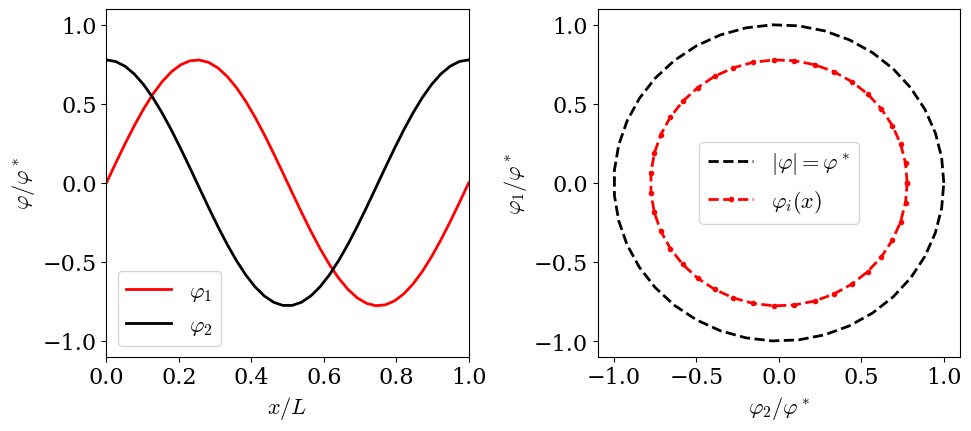

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4.6))
L = 10
xx = np.linspace(0, L, 40)
r = -1
u = 1
k = 2 * np.pi / L 
A = np.sqrt((-r - k**2 ) / u) 
f1 = lambda x : A * np.sin(x *k ) 
f2 = lambda x : A * np.cos(x*k)

ax[0].plot(xx/L, f1(xx), "r", label="$\\varphi_1$")
ax[0].plot(xx/L, f2(xx), "k", label="$\\varphi_2$")
ax[0].legend()
ax[0].set_xlabel("$x/L$")
ax[0].set_ylabel("$\\varphi/\\varphi^*$")

ax[1].plot(np.cos(xx*(2*np.pi/L)), np.sin(xx*(2*np.pi/L)), "k--", label="$|\\varphi| = \\varphi^*$")
ax[1].plot(f2(xx), f1(xx), 'r--.', label="$\\varphi_i(x)$")
ax[1].legend()
ax[1].set_xlabel("$\\varphi_2/\\varphi^*$")
ax[1].set_ylabel("$\\varphi_1/\\varphi^*$")

ax[0].set_yticks([-1, -0.5, 0, 0.5, 1])
ax[0].set_ylim(-1.1, 1.1)
plt.tight_layout()
ax[0].set_xlim(0, 1)
fig.savefig("fig/sol1.pdf" ,bbox_inches='tight')
plt.show()